### UFBA Quantitative Finance Club (@qfcufba)
##### - Case Prático Nível 2  | Manipulação de Dados com Python

          
* **Objetivo do Case:** 
    - Obter dados através de uma API; 
    - Manipular e plotar gráfico de uma série temporal utilizando bibliotecas do Python;
    - Criar função para otimizar processo 

***Instrutor: Saulo Brendo***

In [1]:
# Importação de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Se não tiver instalada, usar o comando: !pip install pandas (no caso do pandas)

In [2]:
# Obtenção dos dados da base do Banco Central
codigo = "4466"

link = f"http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json"

# Converter JSON para DataFrame e armazenar em uma variável
ipca = pd.read_json(link)
ipca

,data,valor
0,01/01/1996,1.51
1,01/02/1996,1.04
2,01/03/1996,1.07
3,01/04/1996,1.25
4,01/05/1996,1.28
...,...,...
312,01/01/2022,1.06
313,01/02/2022,0.94
314,01/03/2022,1.04
315,01/04/2022,1.01


In [3]:
# Exibir informações do DataFrame
ipca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    317 non-null    object 
 1   valor   317 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.1+ KB


<AxesSubplot:>

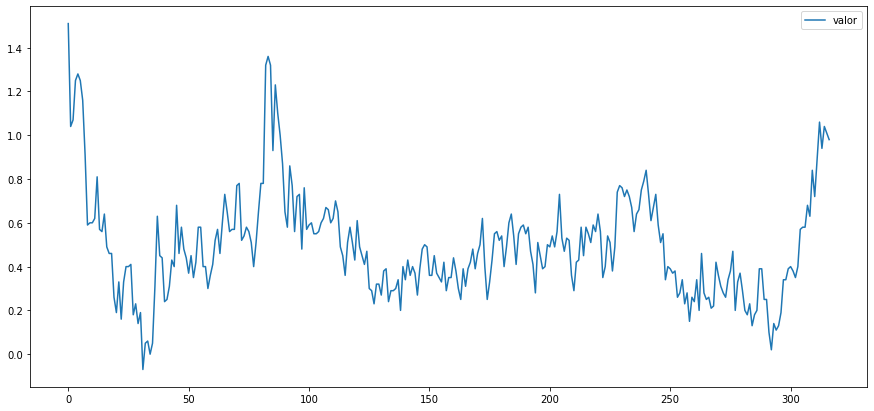

In [4]:
# Plotar gráfico do IPCA
ipca.plot(figsize = (15,7))

In [5]:
# Usar data como índice do DataFrame
ipca.set_index('data', inplace = True)
ipca

,valor
data,
01/01/1996,1.51
01/02/1996,1.04
01/03/1996,1.07
01/04/1996,1.25
01/05/1996,1.28
...,...
01/01/2022,1.06
01/02/2022,0.94
01/03/2022,1.04


<AxesSubplot:xlabel='data'>

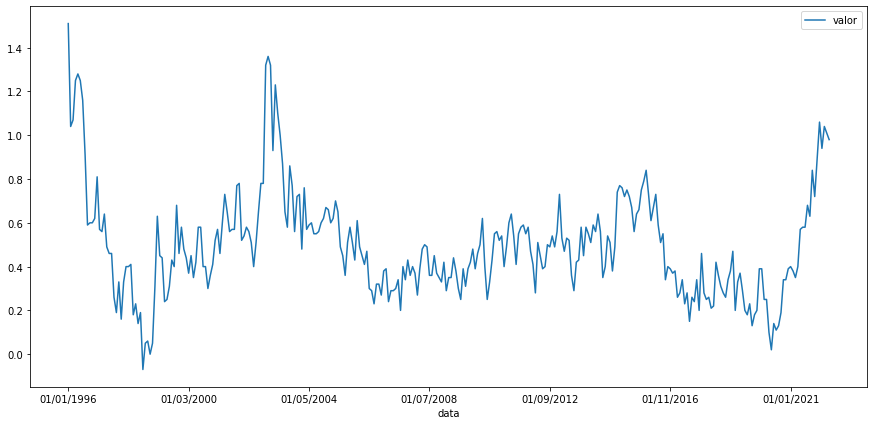

In [6]:
# Plotar gráfico novamente
ipca.plot(figsize = (15,7))

In [7]:
# Função para obter dados da API Banco Central do Brasil(BACEN) através de seu Código de SGS(Sistema Gerenciador de Séries)
def get_bacen(codigo):
    # URL da API para acessar IPCA:
    ## http://api.bcb.gov.br/dados/serie/bcdata.sgs.4466/dados?formato=json
    link = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'
    
    # Ler JSON do link acessado
    df = pd.read_json(link)
    
    # Converter coluna data de "object" para "datetime"
    df['data'] = pd.to_datetime(df['data'], dayfirst = True) 
    df.set_index('data', inplace = True)
    
    return df

In [8]:
# Armazenar série temporal em uma variável | 4466 = IPCA
#https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
serie_temporal = get_bacen(4466)

serie_temporal

,valor
data,
1996-01-01,1.51
1996-02-01,1.04
1996-03-01,1.07
1996-04-01,1.25
1996-05-01,1.28
...,...
2022-01-01,1.06
2022-02-01,0.94
2022-03-01,1.04


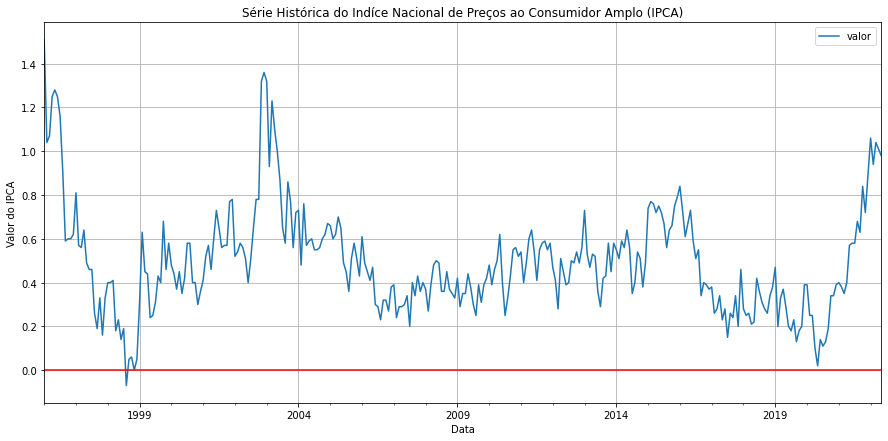

In [9]:
# Plotar série temporal
serie_temporal.plot(grid = True, figsize = (15,7))

# Alterar título do gráfico
plt.title("Série Histórica do Indíce Nacional de Preços ao Consumidor Amplo (IPCA)")

# Alterar nomes dos eixos do gráfico
plt.xlabel('Data')
plt.ylabel('Valor do IPCA')

# Plotar linha vermelha no valor y = 0
plt.axhline(y = 0, color = 'r', linestyle = '-')

In [10]:
# Calcular variação em cada observação
serie_temporal['Variação'] = serie_temporal['valor'] - serie_temporal['valor'].shift(1)
serie_temporal

,valor,Variação
data,,
1996-01-01,1.51,NaN
1996-02-01,1.04,-0.47
1996-03-01,1.07,0.03
1996-04-01,1.25,0.18
1996-05-01,1.28,0.03
...,...,...
2022-01-01,1.06,0.17
2022-02-01,0.94,-0.12
2022-03-01,1.04,0.10


In [11]:
# Verificar informações das colunas do DataFrame
serie_temporal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 317 entries, 1996-01-01 to 2022-05-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   valor     317 non-null    float64
 1   Variação  316 non-null    float64
dtypes: float64(2)
memory usage: 7.4 KB


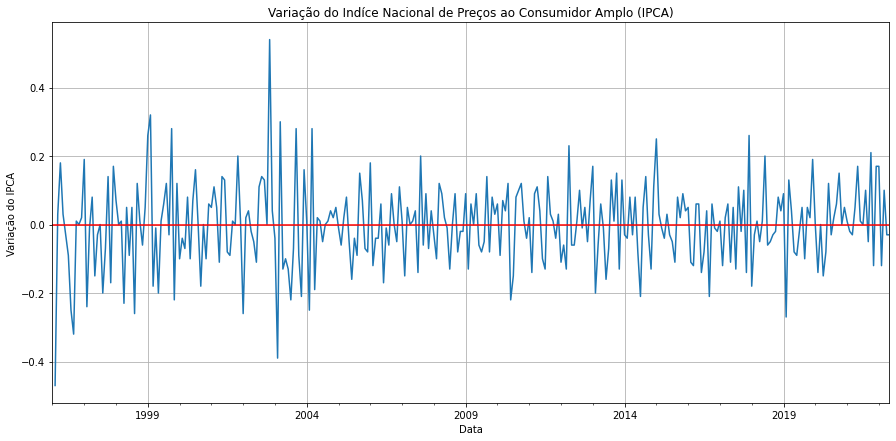

In [12]:
# Plotar série temporal
serie_temporal['Variação'].plot(grid = True, figsize = (15,7))

# Alterar título do gráfico
plt.title("Variação do Indíce Nacional de Preços ao Consumidor Amplo (IPCA)")

# Alterar nomes dos eixos do gráfico
plt.xlabel('Data')
plt.ylabel('Variação do IPCA')

# Plotar linha vermelha no valor y = 0
plt.axhline(y = 0, color = 'r', linestyle = '-')

##### Manipulação de dados de Renda Variável 

In [13]:
# Importação da biblioteca Yahoo Finance
import yfinance as yf

In [14]:
# Obter dados do Ibovespa por meio da API do Yahoo Finance
ativo = yf.download("^BVSP", "2020-01-01", "2022-05-31")
ativo

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500
...,...,...,...,...,...,...
2022-05-24,110340.0,110635.0,108399.0,110581.0,110581.0,11724400
2022-05-25,110085.0,111006.0,109699.0,110580.0,110580.0,10737700
2022-05-26,110577.0,112102.0,110388.0,111890.0,111890.0,13077400


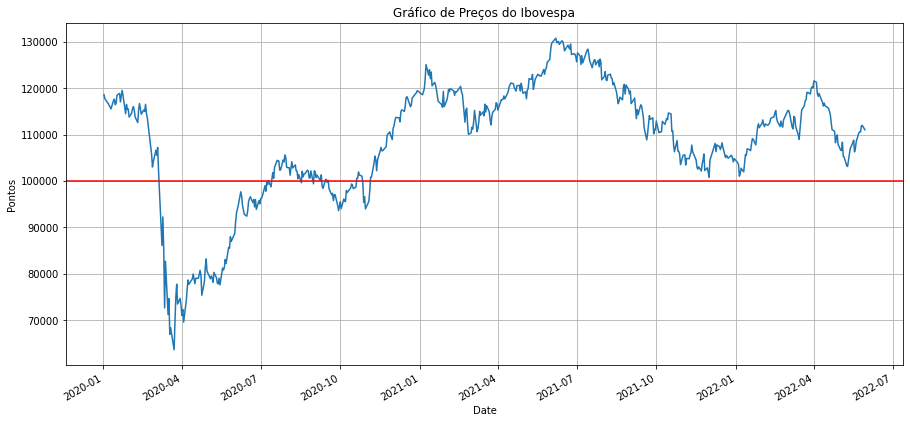

In [15]:
# Plotar gráfico contendo Preço Ajustado, Média Móvel Rápida e Média Móvel Lenta.
ativo['Adj Close'].plot(grid = True, figsize = (15,7))

plt.title("Gráfico de Preços do Ibovespa")
plt.ylabel("Pontos")
plt.axhline(y = 100000, color = 'r', linestyle = '-')

In [16]:
# Definir valor da Média Móvel
mm_fast = 9
mm_slow = 20

# Adicionar coluna Média Móvel ao DataFrame
ativo['MA_Fast'] = np.round(ativo['Adj Close'].rolling(window=mm_fast).mean(), 2)
ativo['MA_Slow'] = np.round(ativo['Adj Close'].rolling(window=mm_slow).mean(), 2)
ativo

,Open,High,Low,Close,Adj Close,Volume,MA_Fast,MA_Slow
Date,,,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700,NaN,NaN
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500,NaN,NaN
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000,NaN,NaN
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100,NaN,NaN
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-05-24,110340.0,110635.0,108399.0,110581.0,110581.0,11724400,108033.44,107107.60
2022-05-25,110085.0,111006.0,109699.0,110580.0,110580.0,10737700,108577.00,107169.15
2022-05-26,110577.0,112102.0,110388.0,111890.0,111890.0,13077400,109128.78,107267.70


In [17]:
# Verificar se há dados faltantes
ativo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 597 entries, 2020-01-02 to 2022-05-30
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       597 non-null    float64
 1   High       597 non-null    float64
 2   Low        597 non-null    float64
 3   Close      597 non-null    float64
 4   Adj Close  597 non-null    float64
 5   Volume     597 non-null    int64  
 6   MA_Fast    589 non-null    float64
 7   MA_Slow    578 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 42.0 KB


Text(0, 0.5, 'Preço')

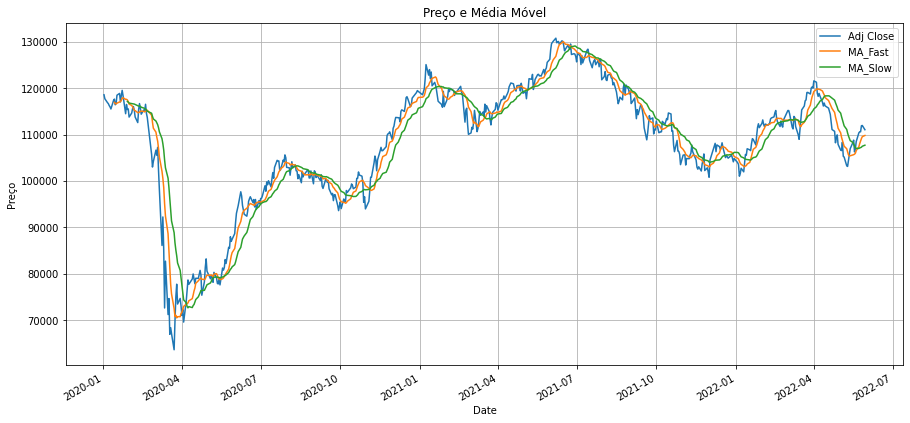

In [18]:
# Plotar gráfico contendo Preço Ajustado, Média Móvel Rápida e Média Móvel Lenta.
ativo[['Adj Close', 'MA_Fast', 'MA_Slow']].plot(grid = True, figsize = (15,7))
plt.title("Preço e Média Móvel")
plt.ylabel("Preço")

In [19]:
# Adicionar coluna Variação Percentual ao DataFrame
ativo['Variação Percentual'] = ativo['Adj Close'].pct_change() * 100
ativo

,Open,High,Low,Close,Adj Close,Volume,MA_Fast,MA_Slow,Variação Percentual
Date,,,,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700,NaN,NaN,NaN
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500,NaN,NaN,-0.730352
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000,NaN,NaN,-0.704291
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100,NaN,NaN,-0.184808
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500,NaN,NaN,-0.355729
...,...,...,...,...,...,...,...,...,...
2022-05-24,110340.0,110635.0,108399.0,110581.0,110581.0,11724400,108033.44,107107.60,0.212966
2022-05-25,110085.0,111006.0,109699.0,110580.0,110580.0,10737700,108577.00,107169.15,-0.000904
2022-05-26,110577.0,112102.0,110388.0,111890.0,111890.0,13077400,109128.78,107267.70,1.184663


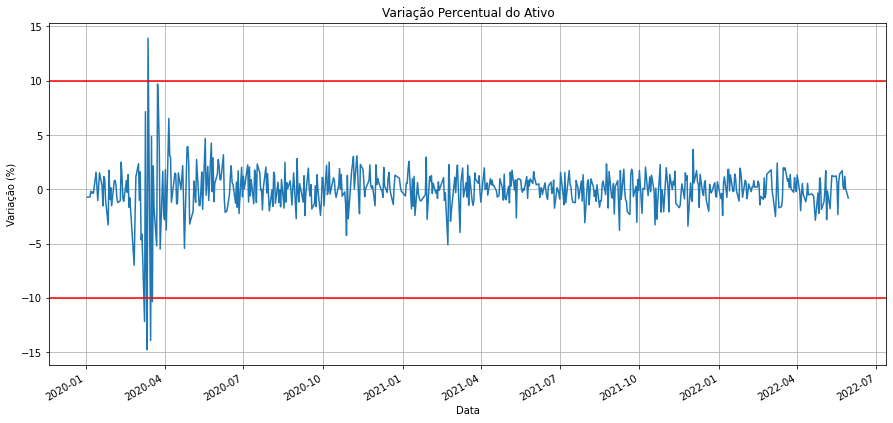

In [20]:
# Plotar gráfico de Variação Percentual do Bitcoin
ativo['Variação Percentual'].plot(grid = True, figsize = (15,7))
plt.title("Variação Percentual do Ativo")
plt.xlabel("Data")
plt.ylabel("Variação (%)")

# Plotar linha vermelha no eixo y
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.axhline(y = -10, color = 'r', linestyle = '-')